In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv
from helper.data_transformer import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from utils import *
import pandas as pd

In [2]:
from tensorflow.python.client import device_lib

print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.9.0
GPU detected: []


In [3]:
data = read_tsv('../../dataset/comlid-data-140422-v1.tsv')

In [4]:
all_data, words, tags = data

In [5]:
df = list_to_dataframe(data)

In [7]:
words = get_unique_words(df)
tags = get_unique_tags(df)

In [8]:
dt_pair = to_token_tag_list(data)

In [9]:
X, y = input_data(words, tags, dt_pair)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
num_words = len(words)
num_tags = len(tags)
max_len = 100
model = blstm_model(num_words, num_tags, max_len)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1344500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 100, 7)           1407      
 ibuted)                                                         
                                                             

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


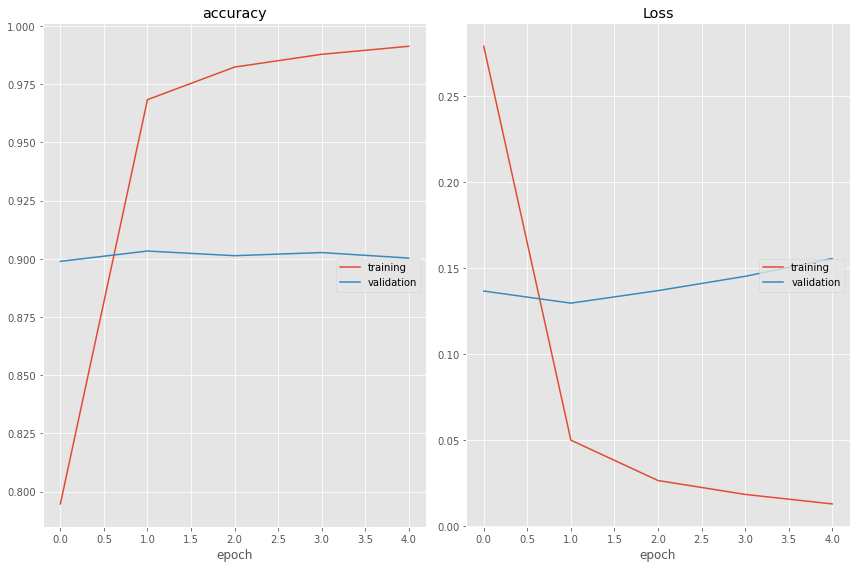

accuracy
	training         	 (min:    0.795, max:    0.991, cur:    0.991)
	validation       	 (min:    0.899, max:    0.903, cur:    0.900)
Loss
	training         	 (min:    0.013, max:    0.279, cur:    0.013)
	validation       	 (min:    0.130, max:    0.156, cur:    0.156)

Epoch 5: val_loss did not improve from 0.12959
56/56 [==============================] - 1s 14ms/step - loss: 0.1555 - accuracy: 0.9003
[0.1555493175983429, 0.9002895951271057]


In [11]:
model_name = 'blstm_model_test.h5'
model_fitting(model, model_name, x_train, y_train, x_test, y_test, num_epoch=5, batch_sz=32)

56/56 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

          ID       0.90      0.95      0.93     21493
          JV       0.87      0.83      0.85      4749
          EN       0.93      0.85      0.89      5206
   MIX-ID-EN       0.96      0.82      0.89       995
   MIX-ID-JV       0.98      0.78      0.87       303
   MIX-JV-EN       0.94      0.78      0.85       238
           O       0.98      0.97      0.98     56066

    accuracy                           0.95     89050
   macro avg       0.94      0.86      0.89     89050
weighted avg       0.95      0.95      0.95     89050



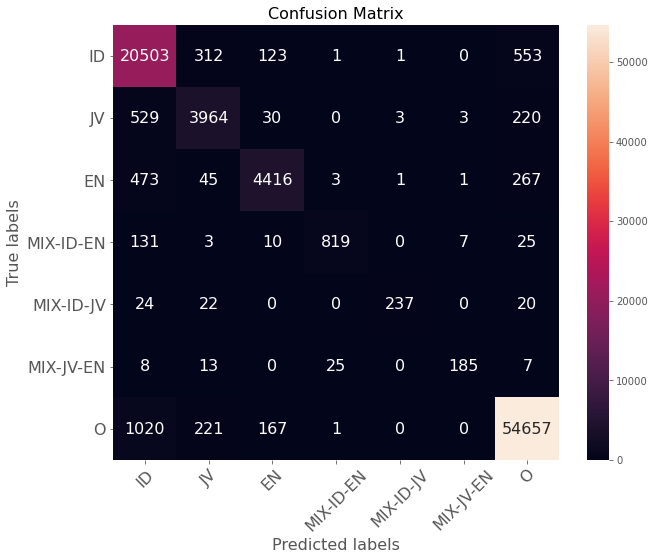

In [12]:
y_actual, y_pred = model_fitting(model, x_test, y_test, tags)
performance_report(y_actual, y_pred)

In [14]:
from keras.models import load_model

mdl = load_model('model/blstm_model_test.h5')

In [113]:
i = np.random.randint(0, x_test.shape[0]) #659
p = mdl.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:30}{:10}\t {}\n".format("Word", "True", "Pred"))
print("-" *60)

for w, true, pred in zip(x_test[i], y_true, p[0]):
    if words[w-1] != "ENDPAD":
        print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 46ms/step
Word                          True      	 Pred

------------------------------------------------------------
kayaknya                      ID        	ID
emang                         ID        	ID
harus                         ID        	ID
download                      EN        	EN
di                            ID        	ID
web                           EN        	EN
gitu                          ID        	ID
deh                           ID        	ID
,                             O         	O
kalo                          ID        	ID
kaya                          ID        	ID
주간                            O         	ID
아이돌                           O         	ID
terus                         ID        	ID
아는                            O         	ID
형님                            O         	ID
masih                         ID        	ID
suka                          ID        	ID
ada                           ID        	ID
yg  

In [163]:
#for i in range(len(x_test)):
all_w_pair = []
all_true_pair = []
all_pred_pair = []
for i in range(0,5):
    p = mdl.predict(np.array([x_test[i]]))
    p = np.argmax(p, axis=-1)
    y_true = y_test[i]
    w_pair = []
    true_pair = []
    pred_pair = []
    for w, true, pred in zip(x_test[i], y_true, p[0]):
        if words[w-1] != "ENDPAD":
            print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))
            w_pair.append(words[w-1])
            true_pair.append(tags[true])
            pred_pair.append(tags[pred])
    all_w_pair.append(w_pair)
    all_true_pair.append(true_pair)
    all_pred_pair.append(pred_pair)

1/1 [==============================] - 0s 22ms/step
Muleh                         JV        	O
muleh                         JV        	JV
galon                         JV        	JV
entek                         JV        	JV
.                             O         	O
Well                          EN        	EN
tenan                         JV        	JV
ncene                         JV        	JV
koncoku                       JV        	JV
1/1 [==============================] - 0s 27ms/step
@emonymphreads                O         	O
setau                         ID        	O
aku                           ID        	ID
di                            ID        	ID
tweet                         EN        	EN
sendiri                       ID        	ID
trs                           ID        	ID
dicopy                        MIX-ID-EN 	MIX-ID-EN
baru                          ID        	ID
nnti                          ID        	ID
di                            ID        	ID
paste        

In [175]:
df_ = pd.DataFrame({
    'word': all_w_pair,
    'true': all_true_pair,
    'pred': all_pred_pair
})

In [176]:
df_

,word,true,pred
0,"[Muleh, muleh, galon, entek, ., Well, tenan, n...","[JV, JV, JV, JV, O, EN, JV, JV, JV]","[O, JV, JV, JV, O, EN, JV, JV, JV]"
1,"[@emonymphreads, setau, aku, di, tweet, sendir...","[O, ID, ID, ID, EN, ID, ID, MIX-ID-EN, ID, ID,...","[O, O, ID, ID, EN, ID, ID, MIX-ID-EN, ID, ID, ..."
2,"[april, mop, diprank, temen, ❎, ❎, ❎, april, m...","[ID, ID, MIX-ID-EN, ID, O, O, O, ID, ID, MIX-I...","[EN, ID, MIX-ID-EN, ID, O, O, O, EN, ID, MIX-I..."
3,"[@tokopedia, min, cek, emoney, di, tokped, lg,...","[O, ID, ID, EN, ID, O, ID, EN, ID, O]","[O, ID, ID, ID, ID, O, ID, EN, ID, O]"
4,"[Mumet, RT, @anggi_djunaedi:, yowes, diselesek...","[JV, EN, O, JV, MIX-ID-JV, JV, O, EN, O, JV, J...","[JV, EN, O, JV, MIX-ID-JV, JV, O, EN, O, JV, J..."


In [178]:
token_true_pred = []
for index, row in df_.iterrows():
    pair = list(zip(row['word'], row['true'], row['pred']))
    token_true_pred.append(pair)

In [179]:
token_true_pred

[[('Muleh', 'JV', 'O'),
  ('muleh', 'JV', 'JV'),
  ('galon', 'JV', 'JV'),
  ('entek', 'JV', 'JV'),
  ('.', 'O', 'O'),
  ('Well', 'EN', 'EN'),
  ('tenan', 'JV', 'JV'),
  ('ncene', 'JV', 'JV'),
  ('koncoku', 'JV', 'JV')],
 [('@emonymphreads', 'O', 'O'),
  ('setau', 'ID', 'O'),
  ('aku', 'ID', 'ID'),
  ('di', 'ID', 'ID'),
  ('tweet', 'EN', 'EN'),
  ('sendiri', 'ID', 'ID'),
  ('trs', 'ID', 'ID'),
  ('dicopy', 'MIX-ID-EN', 'MIX-ID-EN'),
  ('baru', 'ID', 'ID'),
  ('nnti', 'ID', 'ID'),
  ('di', 'ID', 'ID'),
  ('paste', 'EN', 'EN'),
  ('ke', 'ID', 'ID'),
  ('dm', 'EN', 'EN'),
  ('litbase', 'EN', 'ID'),
  ('ka', 'ID', 'ID'),
  (',', 'O', 'O'),
  ('cmiiw', 'EN', 'EN'),
  ('aku', 'ID', 'ID'),
  ('belum', 'ID', 'ID'),
  ('pernah', 'ID', 'ID'),
  ('soalnya', 'ID', 'ID'),
  ('cm', 'ID', 'ID'),
  ('tmn²ku', 'ID', 'ID'),
  ('sering', 'ID', 'ID'),
  ('ksh', 'ID', 'ID'),
  ('tips', 'ID', 'EN'),
  ('ini', 'ID', 'ID'),
  ('😅', 'O', 'O')],
 [('april', 'ID', 'EN'),
  ('mop', 'ID', 'ID'),
  ('diprank', 'MIX-

In [180]:
true_pred_file = 'compare_results_test.tsv'
with open(true_pred_file, "a") as f:
    f.write("Word" + "\t" + "True" + "\t" + "Predict" + "\n")
    for index, row in df_.iterrows():
        for tkn, t_true, t_pred in (zip(row['word'], row['true'], row['pred'])):
            f.write(tkn + '\t' + t_true + '\t' + t_pred + '\n')
        f.write('\n')

In [182]:
all_true_pair

[['JV', 'JV', 'JV', 'JV', 'O', 'EN', 'JV', 'JV', 'JV'],
 ['O',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'EN',
  'EN',
  'ID',
  'O',
  'EN',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O'],
 ['ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'O',
  'O',
  'O',
  'ID',
  'ID',
  'MIX-ID-EN',
  'ID',
  'O',
  'O',
  'O'],
 ['O', 'ID', 'ID', 'EN', 'ID', 'O', 'ID', 'EN', 'ID', 'O'],
 ['JV',
  'EN',
  'O',
  'JV',
  'MIX-ID-JV',
  'JV',
  'O',
  'EN',
  'O',
  'JV',
  'JV',
  'JV',
  'O',
  'JV',
  'JV',
  'ID',
  'JV',
  'O']]

In [187]:
true_flat = [item for sublist in all_true_pair for item in sublist]
pred_flat = [item for sublist in all_pred_pair for item in sublist]

/Users/ahmadfathanhidayatullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahmadfathanhidayatullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ID       0.93      0.84      0.89        32
          JV       0.94      0.94      0.94        16
          EN       0.73      0.80      0.76        10
   MIX-ID-EN       1.00      1.00      1.00         3
   MIX-ID-JV       1.00      1.00      1.00         1
   MIX-JV-EN       0.00      0.00      0.00         0
           O       0.90      1.00      0.95        18

   micro avg       0.90      0.90      0.90        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.90      0.90      0.90        80



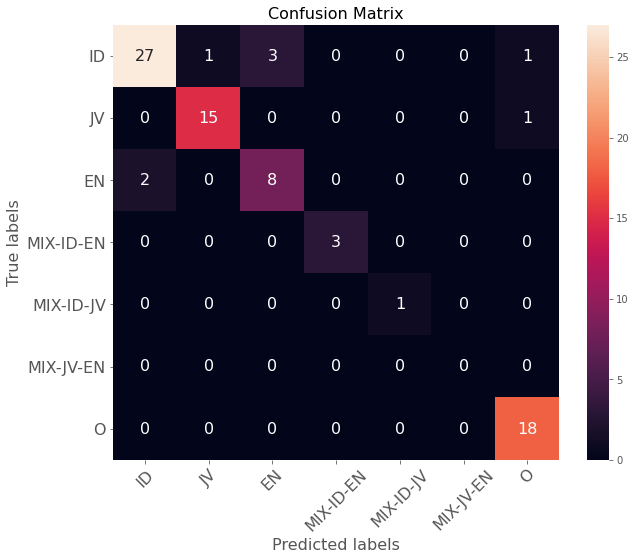

In [188]:
performance_report(true_flat, pred_flat)